In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.shape

(768, 9)

In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

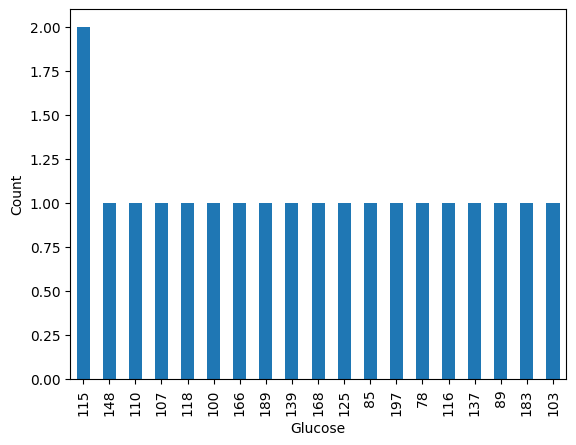

In [11]:
df['Glucose'].head(20).value_counts().plot.bar()
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.show()

In [13]:
x = df.loc[:, df.columns != 'Outcome'].values
y = df['Outcome']

In [14]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.25)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)


In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [18]:
ypred = knn.predict(xtest)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

accuracy = accuracy_score(ypred, ytest)
model_classification_report = classification_report(ypred, ytest)

print(f"Accuracy is : {accuracy}")

print(f"Classification Report : {model_classification_report}")


Accuracy is : 0.6822916666666666
Classification Report :               precision    recall  f1-score   support

           0       0.76      0.75      0.76       126
           1       0.54      0.56      0.55        66

    accuracy                           0.68       192
   macro avg       0.65      0.65      0.65       192
weighted avg       0.69      0.68      0.68       192



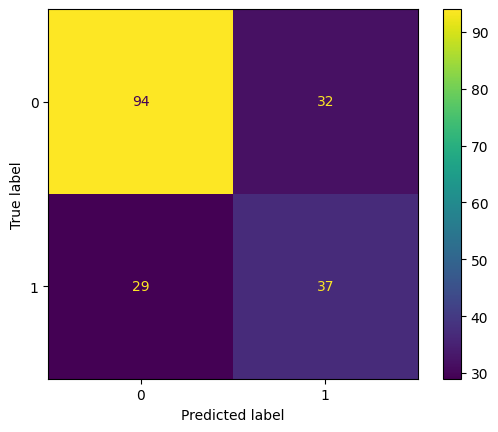

In [23]:
cm = confusion_matrix(ypred, ytest)
display = ConfusionMatrixDisplay(cm)

display.plot()